# Intro

This notebook aims to use Google Colab's gratitude GPU to execute the different experiments.
It exists as a wrapping module for the project.

In order to use you'll have to upload manually:

*   dataset.py
*   model.py
*   utils.py
*   requirements.txt

When activating the blocks you will be demanded to upload a zipped version of tha data, which should be structured like:

Ifwa\Files, train.txt, test.txt

Files is the folder where the folders containing the pictures should be.

This upload might take a while. Took me about 25 minutes, but on weak Hot Spot connection.

The code blocks below replace the original main.py and config.py files. To try different configurations, edit the configurations block below.

**This will be a good time to change your runtime to GPU**

# Setup

In [ ]:
# Install any required Python packages
!pip install -r requirements.txt  # Replace with your actual requirements file if available

In [ ]:
import os
import zipfile
from google.colab import files

import torch
import torchvision
import matplotlib.pyplot as plt

# Local code
from dataset import *
from utils import *
from model import *

In [ ]:
uploaded = files.upload()

# Assuming your zip file is named 'dataset.zip'
zip_file_name = list(uploaded.keys())[0]  # Get the uploaded zip file's name

# Extract the zip file
zip_dataset_dir = "/content/Ifwa"
os.makedirs(zip_dataset_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(zip_dataset_dir)

print(f"Dataset extracted to {zip_dataset_dir}")

# Verify the extracted files
print("Extracted files:")
for root, dirs, files in os.walk(zip_dataset_dir):
    for file in files:
        print(os.path.join(root, file))

Streaming output truncated to the last 5000 lines.
/content/Ifwa/lfwa/Files/Norodom_Chakrapong/Norodom_Chakrapong_0001.jpg
/content/Ifwa/lfwa/Files/Jim_Ahern/Jim_Ahern_0001.jpg
/content/Ifwa/lfwa/Files/Micah_Knorr/Micah_Knorr_0001.jpg
/content/Ifwa/lfwa/Files/Gerardo_Gambala/Gerardo_Gambala_0001.jpg
/content/Ifwa/lfwa/Files/Gerardo_Gambala/Gerardo_Gambala_0002.jpg
/content/Ifwa/lfwa/Files/Charles_Richardson/Charles_Richardson_0001.jpg
/content/Ifwa/lfwa/Files/Mike_Tice/Mike_Tice_0001.jpg
/content/Ifwa/lfwa/Files/Oscar_Bolanos/Oscar_Bolanos_0001.jpg
/content/Ifwa/lfwa/Files/Eva_Dimas/Eva_Dimas_0001.jpg
/content/Ifwa/lfwa/Files/Eva_Dimas/Eva_Dimas_0002.jpg
/content/Ifwa/lfwa/Files/Julianne_Moore/Julianne_Moore_0005.jpg
/content/Ifwa/lfwa/Files/Julianne_Moore/Julianne_Moore_0012.jpg
/content/Ifwa/lfwa/Files/Julianne_Moore/Julianne_Moore_0019.jpg
/content/Ifwa/lfwa/Files/Julianne_Moore/Julianne_Moore_0011.jpg
/content/Ifwa/lfwa/Files/Julianne_Moore/Julianne_Moore_0007.jpg
/content/Ifwa/lfw

# Execute Experiments

Configurations

In [ ]:
# Paths (after unzip)
DATA_ROOT = "/content/Ifwa/lfwa/Files"
TRAIN_FILE = "/content/Ifwa/lfwa/train.txt"
TEST_FILE = "/content/Ifwa/lfwa/test.txt"
MODEL_DIR = "/content/trained_models"
os.makedirs(MODEL_DIR, exist_ok=True)

# DataLoader Parameters
BATCH_SIZE = 8      # Batch size for training and validation
NUM_WORKERS = 2     # Number of worker threads for DataLoader

# Image Transformation Parameters
IMAGE_SIZE = (105, 105)  # Matches the input size in the paper

# Model Parameters:
# CNN Block Configurations
CNN_BLOCKS = [
    {"out_channels": 64, "kernel_size": 10, "stride": 1, "padding": 0, "use_pooling": True, "use_batchnorm": False, "dropout_prob": 0.0},
    {"out_channels": 128, "kernel_size": 7, "stride": 1, "padding": 0, "use_pooling": True, "use_batchnorm": False, "dropout_prob": 0.0},
    {"out_channels": 128, "kernel_size": 4, "stride": 1, "padding": 0, "use_pooling": True, "use_batchnorm": False, "dropout_prob": 0.0},
    {"out_channels": 256, "kernel_size": 4, "stride": 1, "padding": 0, "use_pooling": False, "use_batchnorm": False, "dropout_prob": 0.0},
]

# Fully Connected Layer Configurations
FC_LAYERS = [
    {"in_features": 256 * 6 * 6, "out_features": 4096},  # Fully Connected Layer
]

# Training Parameters
VAL_SPLIT = 0.2                   # Fraction of data for validation (out of train)
MIN_EPOCHS = 50                   # Min number of training epochs
MAX_EPOCHS = 500                      # Max number of training epochs
LEARNING_RATE = 1e-4              # Learning rate for the optimizer
L2_REG = 1e-4                     # L2 regularization strength
EARLY_STOP_PATIENCE = 15          # Number of epochs for early stopping

# Device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Device to use ('cpu' or 'cuda')

# Save Path
MODEL_NAME = "modelTest_best_checkpoint.pth"        # Path to save the best model
SAVE_PATH = os.path.join(MODEL_DIR, MODEL_NAME)

main

[Setup]: Initializing dataset...
[Setup]: Initializing model...
[Training]: Starting training process...
[Training Status]: Epoch 1/500, Train Loss: 0.6964, Val Loss: 0.6526, Time: 0.51 minutes
[Training Status]: Epoch 3/500, Train Loss: 0.4229, Val Loss: 0.7029, Time: 1.19 minutes
[Training Status]: Epoch 4/500, Train Loss: 0.2303, Val Loss: 0.7924, Time: 1.52 minutes
[Training Status]: Epoch 5/500, Train Loss: 0.1218, Val Loss: 0.7495, Time: 1.85 minutes
[Training Status]: Epoch 6/500, Train Loss: 0.0403, Val Loss: 0.8695, Time: 2.20 minutes
[Training Status]: Epoch 7/500, Train Loss: 0.0112, Val Loss: 0.8734, Time: 2.57 minutes
[Training Status]: Epoch 8/500, Train Loss: 0.0033, Val Loss: 0.9293, Time: 2.92 minutes
[Training Status]: Epoch 9/500, Train Loss: 0.0018, Val Loss: 0.9413, Time: 3.29 minutes
[Training Status]: Epoch 10/500, Train Loss: 0.0012, Val Loss: 0.9664, Time: 3.64 minutes
[Training Status]: Epoch 11/500, Train Loss: 0.0008, Val Loss: 0.9993, Time: 3.99 minutes
[Tr

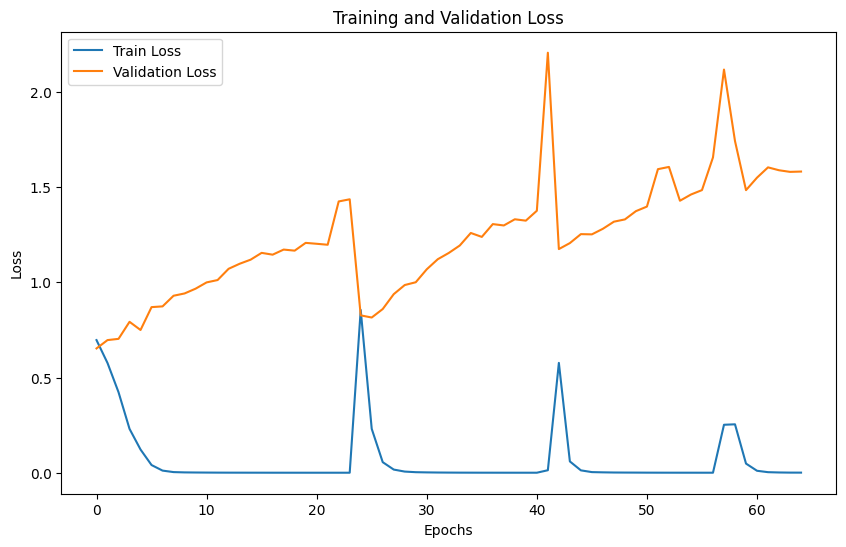

[Setup]: Initializing test dataset...
[Prediction]: Running predictions...
[Prediction]: Loading model from /content/trained_models/model1_best_checkpoint.pth...
[Prediction]: Starting predictions...
[Prediction]: Accuracy: 2.4840


TypeError: Module.load_state_dict() got an unexpected keyword argument 'map_location'

In [ ]:
def visualize_data():
    """Function to visualize a batch of data from the Siamese Network Dataset."""
    # Create the DataLoader using the configuration
        # Create the dataset
    dataset = SiameseNetworkDataset(root_dir=DATA_ROOT, file_list=TRAIN_FILE, transform=None, image_size=IMAGE_SIZE)

    # Create a DataLoader from the dataset
    dataloader = get_dataloader(dataset, batch_size=8, num_workers=NUM_WORKERS)

    # Get a batch of data
    data_iter = iter(dataloader)
    example_batch = next(data_iter)
    img1, img2, labels = example_batch

    # Stack each pair of images vertically and then concatenate the pairs horizontally
    pairs = [torch.cat((img1[i], img2[i]), dim=1) for i in range(img1.size(0))]
    concatenated = torch.cat(pairs, dim=2)

    # Generate labels for the batch
    labels = ["Twin" if label.item() == 1 else "Not Twin" for label in labels]

    # Visualize the grid with labels
    imshow(torchvision.utils.make_grid(concatenated), labels=labels)


def train_model():
        # Initialize the dataset
    print("[Setup]: Initializing dataset...")
    dataset = SiameseNetworkDataset(
        root_dir=DATA_ROOT,
        file_list=TRAIN_FILE,
        image_size=IMAGE_SIZE
    )

    # Initialize the model
    print("[Setup]: Initializing model...")
    model = SiameseNetwork(CNN_BLOCKS, FC_LAYERS).to(DEVICE)

    # Start training
    print("[Training]: Starting training process...")
    train_losses, val_losses = train(
        model=model,
        dataset=dataset,
        batch_size=BATCH_SIZE,
        val_split=VAL_SPLIT,
        epochs=(MIN_EPOCHS, MAX_EPOCHS),
        lr=LEARNING_RATE,
        l2_reg=L2_REG,
        early_stop_patience=EARLY_STOP_PATIENCE,
        save_path=SAVE_PATH,
        num_workers=NUM_WORKERS,
        device=DEVICE,
        qa_mode=True
    )

    print("[Training]: Training complete. Model saved.")

        # Plot training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()


def main_predict():
    """
    Main function to handle predictions using a trained Siamese Neural Network.
    Function will print a batch's prediction for inspection
    """
    # Initialize the test dataset
    print("[Setup]: Initializing test dataset...")
    test_dataset = SiameseNetworkDataset(
        root_dir=DATA_ROOT,
        file_list=TEST_FILE,
        image_size=IMAGE_SIZE
    )

    # Run predictions
    print("[Prediction]: Running predictions...")
    _ = predict(
        model_path=SAVE_PATH,
        cnn_blocks=CNN_BLOCKS,
        fc_layers=FC_LAYERS,
        test_dataset=test_dataset,
        batch_size=BATCH_SIZE,
        num_workers=NUM_WORKERS,
        device=DEVICE
    )

    # Visualize a few samples from the test set
    test_loader = get_dataloader(test_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)
    data_iter = iter(test_loader)
    img1, img2, label = next(data_iter)

    # Load the model for prediction
    model = SiameseNetwork(CNN_BLOCKS, FC_LAYERS).to(DEVICE)
    model.load_state_dict(torch.load(SAVE_PATH, map_location=DEVICE, weights_only=True))
    model.eval()

    with torch.no_grad():
        outputs = model(img1.to(DEVICE), img2.to(DEVICE)).squeeze()
        similarity_scores = [f"Sim: {score:.2f}" for score in outputs.cpu().tolist()]

        # Stack each pair of images vertically and then concatenate the pairs horizontally
        pairs = [torch.cat((img1[i], img2[i]), dim=1) for i in range(img1.size(0))]
        concatenated = torch.cat(pairs, dim=2)

        # Display the grid of stacked pairs with labels
        imshow(torchvision.utils.make_grid(concatenated), labels=similarity_scores)


def view_mistakes(k=5):
    """
    Main function to handle predictions on the test dataset and display the k most mismatched predictions.
    Mismatched predictions are ranked by the absolute error between the predicted similarity score
    and the actual label.

    Args:
        k (int): Number of mistakes to display.
    """
    # Initialize the test dataset
    print("[Setup]: Initializing test dataset...")
    test_dataset = SiameseNetworkDataset(
        root_dir=DATA_ROOT,
        file_list=TEST_FILE,
        image_size=IMAGE_SIZE
    )

    # Load the test DataLoader
    test_loader = get_dataloader(test_dataset, batch_size=1, num_workers=NUM_WORKERS)

    # Load the trained model
    print("[Prediction]: Loading model...")
    model = SiameseNetwork(CNN_BLOCKS, FC_LAYERS).to(DEVICE)
    model.load_state_dict(torch.load(SAVE_PATH, map_location=DEVICE, weights_only=True))
    model.eval()

    # Collect predictions and labels
    mismatches = []  # Store tuples: (abs_error, img1, img2, score, label)
    all_scores = []  # Collect all predicted scores
    with torch.no_grad():
        for img1, img2, labels in test_loader:
            img1, img2, labels = img1.to(DEVICE), img2.to(DEVICE), labels.to(DEVICE)

            # Predict similarity score
            outputs, labels = model(img1, img2).squeeze(), labels.squeeze() # Remove extra dimension
            abs_error = torch.abs(outputs - labels).item()

            # Store the mismatch details
            mismatches.append((abs_error, img1.cpu(), img2.cpu(), outputs.item(), labels.item()))

            # Collect scores and labels for analysis
            all_scores.append(outputs.item())

    # Sort mismatches by absolute error in descending order
    mismatches.sort(key=lambda x: x[0], reverse=True)

    # Display the top k mismatches
    print(f"\n[Output]: Displaying top {k} mismatches:")
    for i, (abs_error, img1, img2, score, label) in enumerate(mismatches[:k]):
        print(f"\nMistake {i+1}:")
        print(f"  Predicted Score: {score:.2f}")
        print(f"  Actual Label: {label:.0f}")
        print(f"  Absolute Error: {abs_error:.2f}")

        # Visualize the mismatched images
        concatenated = torch.cat((img1, img2), 0)
        imshow(torchvision.utils.make_grid(concatenated), labels=[f"Pred: {score:.2f}", f"Label: {label:.0f}"])

    # Plot the distribution of predictions
    plt.figure(figsize=(10, 6))
    plt.hist(all_scores, bins=20, alpha=0.7, label="Predicted Scores", color='blue')
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Predicted Scores")
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 1)  # Explicitly set the x-axis range to [0, 1]
    plt.show()

    print("[Analysis]: Prediction confidence distribution plotted.")

if __name__ == "__main__":

    def menu():
        print("\nMenu:")
        print("1. Visualize Data")
        print("2. Train a Model")
        print("3. Test Existing Model")
        print("4. View main Mistakes")
        print("5. Exit")

    while True:
        menu()
        try:
            choice = int(input("Enter your choice: "))
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
            continue

        if choice == 1:
            visualize_data()
        elif choice == 2:
            train_model()
        elif choice == 3:
            main_predict()
        elif choice == 4:
            view_mistakes()
        elif choice == 5:
            print("\nExiting the program. Goodbye!")
        else:
            print("Invalid choice. Please select a valid option.")
        sys.exit()